# This code plots the classical confidence interval using Neyman's construction. i.e. for every value of mu (signal events), it gets the UL on n (number of data events) using poisson statistics

BKg is taken to be 3 for this case. We try to reproduce arXiv: 9711021 (Feldman's and Cousin's paper) fig 6 

In [11]:
###Developer: Shilpi Jain

import numpy as np
from scipy.stats import norm
import ROOT
from scipy.stats import poisson
from array import array
import math
import matplotlib.pyplot as plt

In [12]:
## Generate a few values of mu from 0 to 20 with spacing 21./500. One can increase the spacing as much as one wants or put it to be 1
#mu_true = np.linspace(0, 20, 20001)
mu_true = np.linspace(0, 20, 500)
print(mu_true)
len(mu_true)
bkg = 3

[ 0.          0.04008016  0.08016032  0.12024048  0.16032064  0.2004008
  0.24048096  0.28056112  0.32064128  0.36072144  0.4008016   0.44088176
  0.48096192  0.52104208  0.56112224  0.6012024   0.64128257  0.68136273
  0.72144289  0.76152305  0.80160321  0.84168337  0.88176353  0.92184369
  0.96192385  1.00200401  1.04208417  1.08216433  1.12224449  1.16232465
  1.20240481  1.24248497  1.28256513  1.32264529  1.36272545  1.40280561
  1.44288577  1.48296593  1.52304609  1.56312625  1.60320641  1.64328657
  1.68336673  1.72344689  1.76352705  1.80360721  1.84368737  1.88376754
  1.9238477   1.96392786  2.00400802  2.04408818  2.08416834  2.1242485
  2.16432866  2.20440882  2.24448898  2.28456914  2.3246493   2.36472946
  2.40480962  2.44488978  2.48496994  2.5250501   2.56513026  2.60521042
  2.64529058  2.68537074  2.7254509   2.76553106  2.80561122  2.84569138
  2.88577154  2.9258517   2.96593186  3.00601202  3.04609218  3.08617234
  3.12625251  3.16633267  3.20641283  3.24649299  3.2

In [13]:
def get_lower_limit_pois(mu,b, prob):
    # tmp_prob = 0
    # n = 0
    boundary = poisson.ppf(prob, mu=mu+b)
    return boundary
    ##### code here

def get_upper_limit_pois(mu,b, prob):
    # tmp_prob = 0
    # n = 0
    # nbest = mu+b
    ### code here
    boundary = poisson.ppf(1-prob, mu=mu+b)
    return boundary

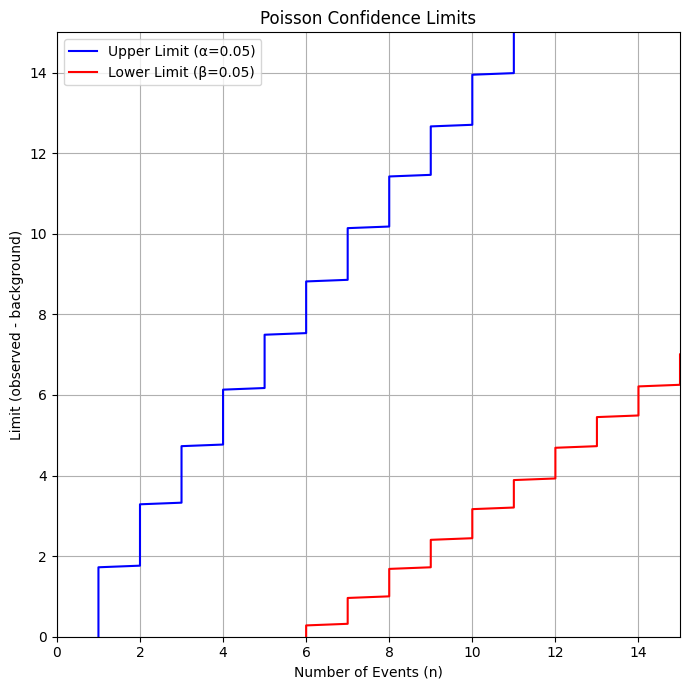

In [19]:
ntot = 0

### now loop over mu and the upper and lower limits on n

# Store limits
lm_list = []
hm_list = []
alpha = 0.05  # significance level for lower limit
beta = 0.05   # significance level for upper limit

# Loop and compute
for mu in mu_true:
    lm = get_lower_limit_pois(mu, bkg, alpha)
    hm = get_upper_limit_pois(mu, bkg, beta)
    lm_list.append(lm)
    hm_list.append(hm)

# Plotting
plt.figure(figsize=(7, 7))
plt.plot(lm_list, mu_true, label='Upper Limit (α=0.05)', color='blue')
plt.plot(hm_list, mu_true, label='Lower Limit (β=0.05)', color='red')
plt.xlabel('Number of Events (n)')
plt.ylabel('Limit (observed - background)')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title('Poisson Confidence Limits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# for mu in mu_true:
#         beta = 0.05
#         alpha = 0.05
#         ### code here
#         lm = get_lower_limit_pois(mu, bkg, alpha)
#         hm = get_upper_limit_pois(mu, bkg, beta)



In [15]:



### switch the axis to get the exact plot as in Feldman's and Cousin's paper in fig 6






